<a href="https://colab.research.google.com/github/GoshenEngineer/first-repo/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# importing the performance evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Data Collection and Processing

In [269]:
#loading the dataset to the Pandas
df = pd.read_csv(r'C:\Users\Admin\Downloads\Car Prediction Prediciton\cardekho_dataset.csv', index_col = 0)
pd.set_option('display.max_columns', None)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [270]:
#checking the first ten rows of the dataset
df.head(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [271]:
df2=df.copy()

In [272]:
#printing the last 10 rows of the dataset
df.tail(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19531,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
19533,Honda Amaze,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000
19534,Renault KWID,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000
19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
19536,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [273]:
# get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


Conclusion from the info: Checking the info of the dataset, the conclusion drawn based on the datatype of each features is that: Most features are object and Integers excluding the mileage and max_power which are in float. The datasets consists of our 13 features in which 6 are categorical(object), 5 are integers(continous) and the remaining features are in float.

In [274]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

***Variable Description***


In [275]:
#checking for the numbers of rows and columns in the data Frame#checking for the numbers of rows and columns in the data Frame
df.shape

(15411, 13)

In [276]:
df.isna().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [277]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

SPECIFIC FEATURES (CATEGORICAL VARIABLE) ANALYSIS

In [278]:
[df[df['brand'].str.startswith('T')]]

[              car_name   brand     model  vehicle_age  km_driven seller_type  \
 21       Toyota Innova  Toyota    Innova            8     110000  Individual   
 35     Toyota Fortuner  Toyota  Fortuner            8     110000  Individual   
 96          Tata Tiago    Tata     Tiago            4      32100  Individual   
 105      Toyota Innova  Toyota    Innova            5     120000  Individual   
 190         Tata Tiago    Tata     Tiago            5       9500  Individual   
 ...                ...     ...       ...          ...        ...         ...   
 19489       Tata Tiago    Tata     Tiago            4      30000  Individual   
 19498      Tata Safari    Tata    Safari           10     120000  Individual   
 19507    Toyota Innova  Toyota    Innova           12      74000      Dealer   
 19516     Toyota Yaris  Toyota     Yaris            3      41000      Dealer   
 19527    Toyota Innova  Toyota    Innova            3      21265  Individual   
 
       fuel_type transmiss

Data Visualization

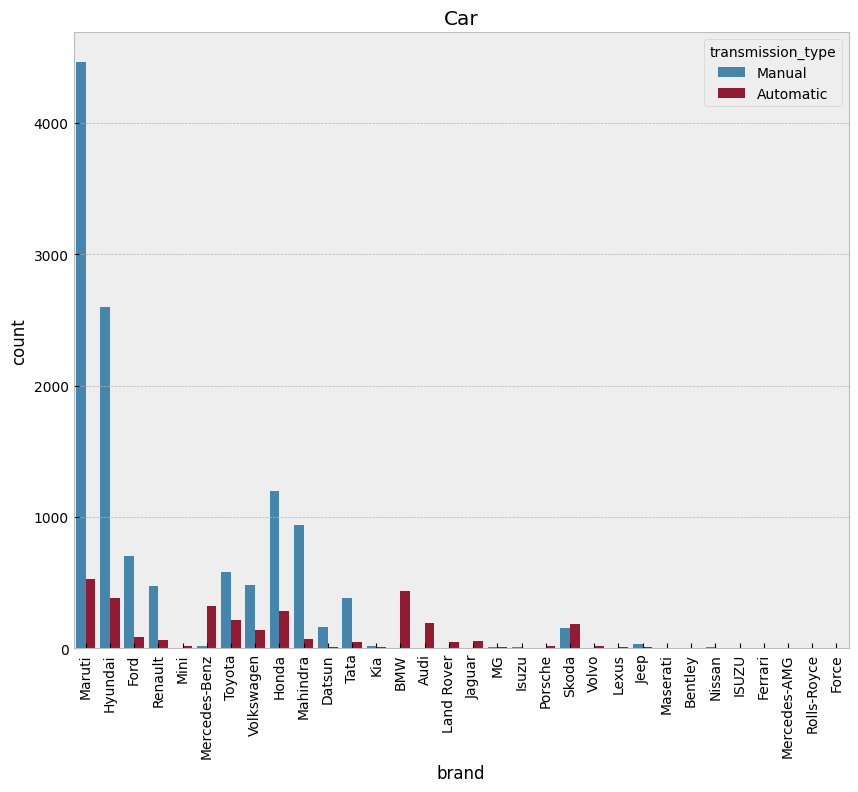

In [279]:
# let's visualize the condition of the house columnn
plt.figure(figsize=(10,8))
sns.countplot(x='brand', data=df, hue = 'transmission_type')
plt.title('Car')
plt.xticks(rotation = 'vertical')
#plt.savefig('Condition of the house')
plt.show()

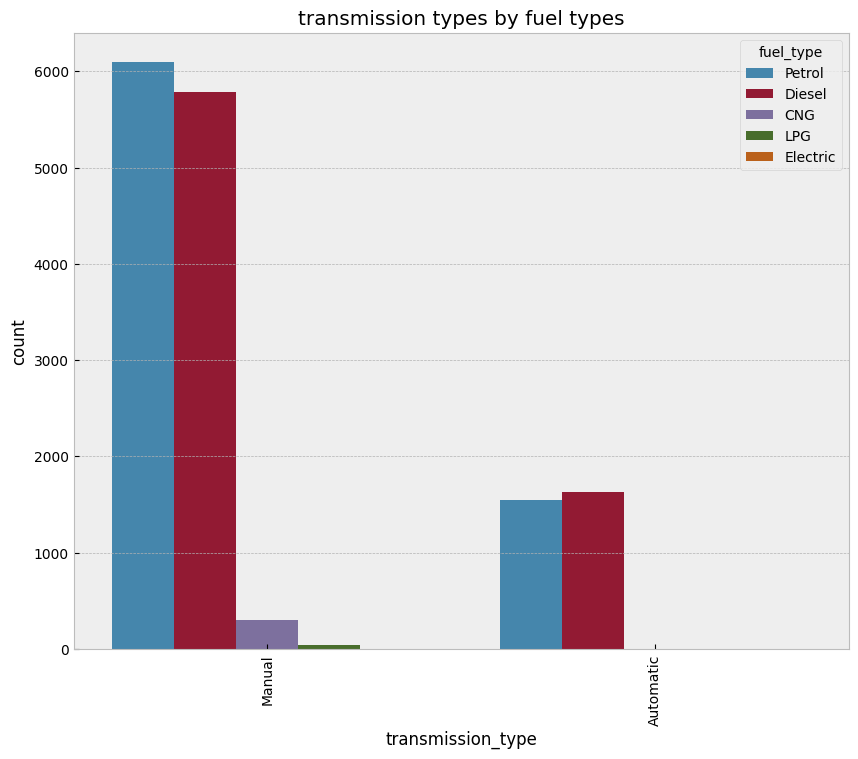

In [280]:
# let's visualize the different fuel types under the transmission types
plt.figure(figsize=(10,8))
sns.countplot(x='transmission_type', data=df, hue = 'fuel_type')
plt.title('transmission types by fuel types')
plt.xticks(rotation = 'vertical')

plt.show()

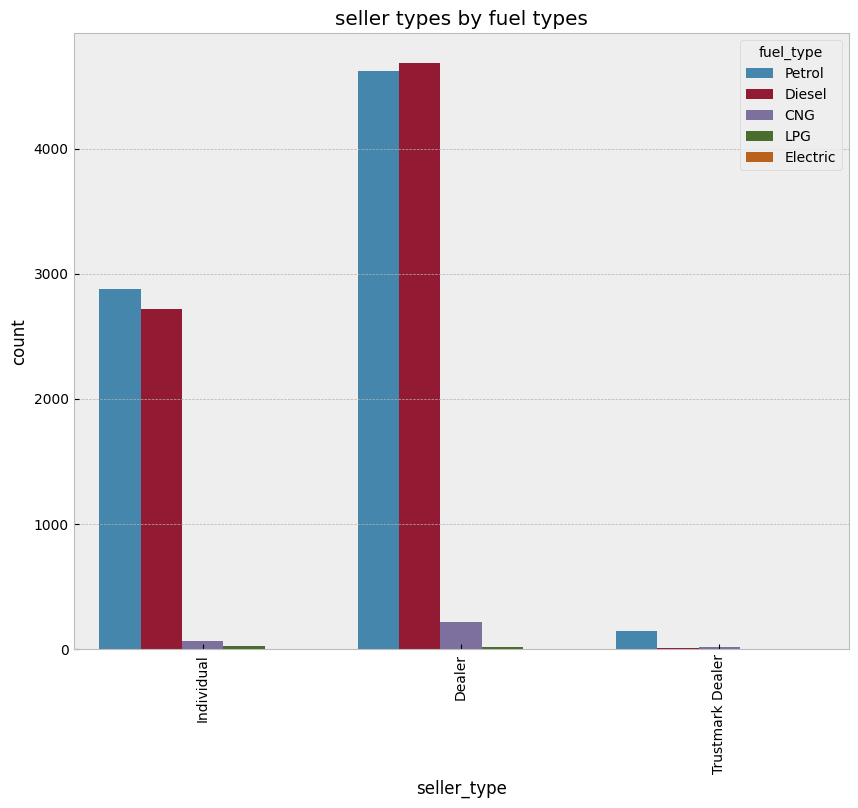

In [281]:
# let's visualize the different fuel types under the transmission types
plt.figure(figsize=(10,8))
sns.countplot(x='seller_type', data = df, hue = 'fuel_type')
plt.title('seller types by fuel types')
plt.xticks(rotation = 'vertical')

plt.show()

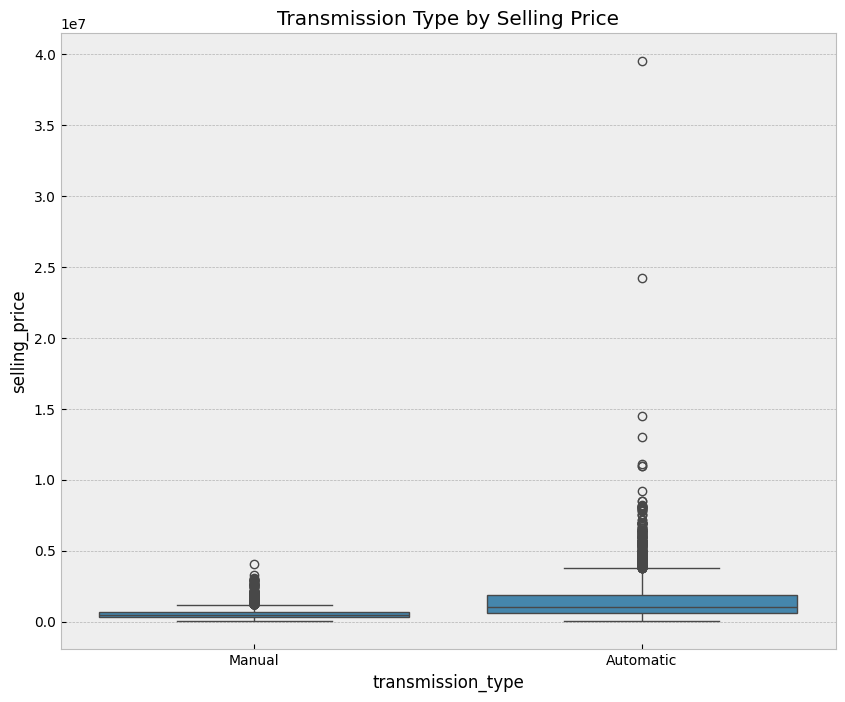

In [282]:
# visuallize the hypertension variable using boxplot
plt.style.use('bmh')
plt.figure(figsize=(10,8))
sns.boxplot(x='transmission_type', y='selling_price',  data=df)
plt.title('Transmission Type by Selling Price')
plt.show()

In [283]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [284]:
categorical_columns

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [285]:
df[['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
19540,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
19541,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
19542,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [287]:
numerical_columns = list(df.dtypes[df.dtypes == 'float64'].index) + list(df.dtypes[df.dtypes == 'int64'].index)

In [288]:
numerical_columns

['mileage',
 'max_power',
 'vehicle_age',
 'km_driven',
 'engine',
 'seats',
 'selling_price']

In [289]:
categorical_columns[1:6]

['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [290]:
c = 'brand'

In [291]:
str.upper(c)

'BRAND'

In [292]:
for c in categorical_columns[1:6]:
    print(str.upper(c))
    print(df[c].unique(), df[c].nunique())

BRAND
['Maruti' 'Hyundai' 'Ford' 'Renault' 'Mini' 'Mercedes-Benz' 'Toyota'
 'Volkswagen' 'Honda' 'Mahindra' 'Datsun' 'Tata' 'Kia' 'BMW' 'Audi'
 'Land Rover' 'Jaguar' 'MG' 'Isuzu' 'Porsche' 'Skoda' 'Volvo' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Nissan' 'ISUZU' 'Ferrari' 'Mercedes-AMG'
 'Rolls-Royce' 'Force'] 32
MODEL
['Alto' 'Grand' 'i20' 'Ecosport' 'Wagon R' 'i10' 'Venue' 'Swift' 'Verna'
 'Duster' 'Cooper' 'Ciaz' 'C-Class' 'Innova' 'Baleno' 'Swift Dzire'
 'Vento' 'Creta' 'City' 'Bolero' 'Fortuner' 'KWID' 'Amaze' 'Santro'
 'XUV500' 'KUV100' 'Ignis' 'RediGO' 'Scorpio' 'Marazzo' 'Aspire' 'Figo'
 'Vitara' 'Tiago' 'Polo' 'Seltos' 'Celerio' 'GO' '5' 'CR-V' 'Endeavour'
 'KUV' 'Jazz' '3' 'A4' 'Tigor' 'Ertiga' 'Safari' 'Thar' 'Hexa' 'Rover'
 'Eeco' 'A6' 'E-Class' 'Q7' 'Z4' '6' 'XF' 'X5' 'Hector' 'Civic' 'D-Max'
 'Cayenne' 'X1' 'Rapid' 'Freestyle' 'Superb' 'Nexon' 'XUV300' 'Dzire VXI'
 'S90' 'WR-V' 'XL6' 'Triber' 'ES' 'Wrangler' 'Camry' 'Elantra' 'Yaris'
 'GL-Class' '7' 'S-Presso' 'Dzire LXI' 'Au

In [293]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [294]:
#Create the features and the Target Varaible
X = df.drop(['car_name','selling_price'], axis = 1)
Y = df['selling_price']

In [302]:
len(df['model'].unique())

120

In [303]:
#Split Categorical and Numerical Features
numerical_cols = ['mileage', 'max_power', 'vehicle_age', 'km_driven', 'engine', 'seats']
categorical_cols = [
    'brand', 
    'seller_type', 
    'fuel_type', 
    'transmission_type'
    ]
model_col = ['model'] #high-cardinality

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Categorical pipeline (using OrdinalEncoder for embedding later)
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

model_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine into ColumnTransformer
x_preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols),
    ('model', model_pipeline,model_col)
])

In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_poc = x_preprocessor.fit_transform(X_train)

X_test_proc = x_preprocessor.transform(X_test)

In [308]:
# Separate last column (model) from the rest
num_cat_train = X_train_poc[:, :-1]
model_train = X_train_poc[:, -1].astype('int32')

num_cat_test = X_test_proc[:, :-1]
model_test = X_test_proc[:, -1].astype('int32')

# get input shapes
print("num_cat_train shape:", num_cat_train.shape)
print("model_train shape:", model_train.shape)

num_cat_train shape: (12328, 10)
model_train shape: (12328,)


In [ ]:
model_vocab_size = len(X_train['model'].unique())
embedding_dim = 16  # good starting size


import tensorflow as tf
from tensorflow.keras import layers, models

# Inputs
num_cat_input = layers.Input(shape=(num_cat_train.shape[1],))
model_input = layers.Input(shape=(1,))

# Embedding for model
embed = layers.Embedding(input_dim=model_vocab_size+1, output_dim=embedding_dim)(model_input)
embed = layers.Flatten()(embed)

# Combine
combined = layers.Concatenate()([num_cat_input, embed])

# Dense layers
x = layers.Dense(128, activation='relu')(combined)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)  # regression output

# Build + compile
nn_model = models.Model(inputs=[num_cat_input, model_input], outputs=output)
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
nn_model.fit(
    [num_cat_train, model_train], y_train,
    validation_data=([num_cat_test, model_test], y_test),
    epochs=50, batch_size=32
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


model_vocab_size = len(X_train['model'].unique())
embedding_dim = 16

# inputs
num_cat_input = layers.Input(shape=(num_cat_features_count,))  # from numerical + low-card cats
model_input = layers.Input(shape=(1,))  # just one integer per sample

# embedding part
embed = layers.Embedding(input_dim=model_vocab_size+1, output_dim=embedding_dim)(model_input)
embed = layers.Flatten()(embed)

# combine
combined = layers.Concatenate()([num_cat_input, embed])

# dense layers
x = layers.Dense(128, activation='relu')(combined)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)  # regression

model = models.Model(inputs=[num_cat_input, model_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae']




In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split first
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Fit on train, transform train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [226]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1, 1))


In [227]:
X_train_scaled.shape

(12328, 168)

In [228]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [229]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)


In [230]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [231]:
model.fit(X_train_scaled, y_train_scaled,
          validation_split=0.2, epochs=200,batch_size=25,
          callbacks=[callback])

Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5910 - mae: 0.3216 - val_loss: 0.4778 - val_mae: 0.2252
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3319 - mae: 0.2329 - val_loss: 0.5334 - val_mae: 0.1924
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2387 - mae: 0.1939 - val_loss: 0.4434 - val_mae: 0.1883
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2435 - mae: 0.1800 - val_loss: 0.5386 - val_mae: 0.1720
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1980 - mae: 0.1678 - val_loss: 0.3153 - val_mae: 0.1518
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1875 - mae: 0.1574 - val_loss: 0.2881 - val_mae: 0.1557
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1676 - mae: 0.1518 - val_loss: 0.3947 - val_mae: 0.1484
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1474 - mae: 0.1432 - val_loss: 0.4499 - val_mae: 0.1616
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [68]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0453 - mae: 0.1046 - val_loss: 1.9921 - val_mae: 0.1615
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0485 - mae: 0.1055 - val_loss: 1.0729 - val_mae: 0.1548
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0626 - mae: 0.1104 - val_loss: 1.8729 - val_mae: 0.1579
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0437 - mae: 0.1049 - val_loss: 1.4456 - val_mae: 0.1537
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0509 - mae: 0.1043 - val_loss: 1.5642 - val_mae: 0.1503
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0454 - mae: 0.1015 - val_loss: 1.1119 - val_mae: 0.1731
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0589 - mae: 0.1070 - val_loss: 1.5408 - val_mae: 0.1562
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0477 - mae: 0.1024 - val_loss: 1.6998 - val_mae: 0.1543
Epoch 9/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [232]:
# After training
y_pred_scaled = model.predict(X_test_scaled)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [233]:
y_pred_scaled.shape

(3083, 1)

In [234]:
# Convert predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [235]:
y_pred

array([[204742.69],
       [641454.3 ],
       [589325.  ],
       ...,
       [896744.56],
       [431360.97],
       [972078.9 ]], dtype=float32)

In [236]:
# Evaluate on original scale
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 73075900416.0
R²: 0.9029254913330078


In [33]:
y_test

4259      190000
13896     600000
3212      665000
14374    1570000
12058     160000
          ...   
2495      295000
13344     840000
16624     790000
8361      440000
18229     861000
Name: selling_price, Length: 3083, dtype: int64

Save the model

In [ ]:
with open(out_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'the model is saved to {out_file}')
##